# House of Blocks - Image Preprocessing Attempts

This workbook is to showcase some examples of image preprocessing I attempted to generate better input images.

In [2]:
import numpy as np
import pandas as pd
import os

PATH = "/kaggle/input/applications-of-deep-learning-wustl-fall-2020/final-kaggle-data/"
PATH_TRAIN = os.path.join(PATH, "train.csv")
PATH_TEST = os.path.join(PATH, "test.csv")

Next we check versions and if the GPU is available. 

In [3]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() \
      else "NOT AVAILABLE")

Tensor Flow Version: 2.3.0
Keras Version: 2.4.0

Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
Pandas 1.1.1
Scikit-Learn 0.23.2
GPU is NOT AVAILABLE


Next, we prepare to read the training data (that we have labels for) and the test data that we must predict and send to Kaggle.

In [4]:
df_train = pd.read_csv(PATH_TRAIN)
df_test = pd.read_csv(PATH_TEST)

df_train = df_train[df_train.id != 1300]

df_train['filename'] = df_train["id"].astype(str)+".png"
df_train['stable'] = df_train['stable'].astype(str)

df_test['filename'] = df_test["id"].astype(str)+".png"

# 1. Failed Attempts (Skip this part)

In [8]:
#adjust brightness
import cv2 as cv
import tensorflow as tf
#for i in df5:
img = cv.imread(f'{PATH}387.png')
bright = np.array(tf.image.adjust_brightness(img, 0.2))
cv.imwrite(f'{PATH}387.png', bright)

False

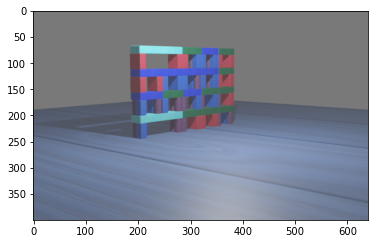

In [9]:
plt.imshow(bright)

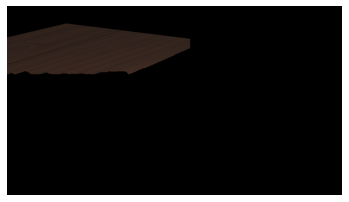

In [10]:
#bad example of background removal
import cv2 as cv
from matplotlib import pyplot as plt
# Load image
image_bgr = cv.imread(f'{PATH}10002.png')
# Convert to RGB
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)
# Rectange values: start x, start y, width, height
rectangle = (0, 10, 700, 250)
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

In [11]:
# failure - trim the background
from skimage import io
def trim(img):
        img2=img.sum(axis=2)
        (row,col)=img2.shape
        top=0
        bottom=0
        left=0
        right=0
        for r in range(0,row):
                if img2.sum(axis=1)[r]<765*col:
                        top=r
                        break
 
        for r in range(row-1,0,-1):
                if img2.sum(axis=1)[r]<765*col:
                        bottom=r
                        break
 
        for c in range(0,col):
                if img2.sum(axis=0)[c]<765*row:
                        left=c
                        break
 
        for c in range(col-1,0,-1):
                if img2.sum(axis=0)[c]<765*row:
                        right=c
                        break
 
        new_img=img[top:bottom+1,left:right+1,0:3]
        return new_img
#for i in df5:
img = io.imread(f'{PATH}1.png')
img_trim = trim(img)
#io.imsave("/Users/sweety/targetDirectory/Trimmed/%s.jpg"%(i), img_trim)

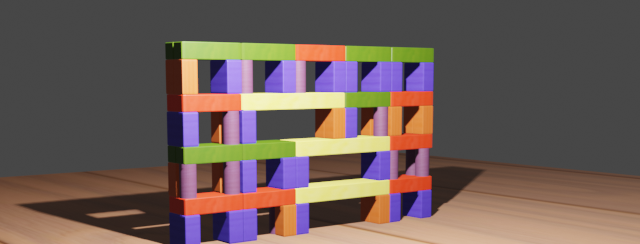

In [12]:
from PIL import Image, ImageFile
Image.fromarray(img_trim, 'RGB')

In [13]:
#resize
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
def make_square(img):
    cols,rows = img.size
    extra = abs(rows-cols)/2
    
    if rows>cols:
        r = (0,extra,cols,cols+extra)
    else:
        r = (extra,0,rows+extra,rows)

    return img.crop(r)

img = Image.open(f'{PATH}{df_train.iloc[0,2]}')
img = make_square(img)
img = img.resize((120,120),Image.ANTIALIAS)


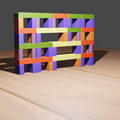

In [14]:
img

# 2. Examples of Image Augmentation

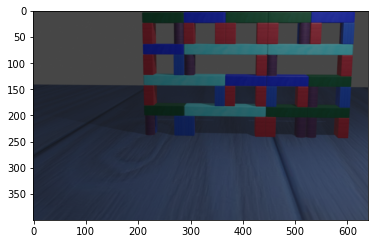

In [17]:
import matplotlib.pyplot as plt
import cv2 as cv
# initial image 10001
plt.imshow(cv.imread(f'{PATH}10001.png'))

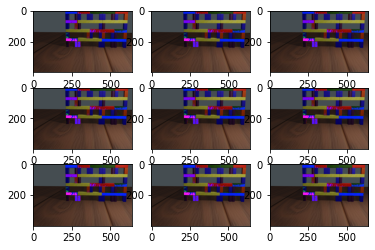

In [18]:
# example of adjusting contrast
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from PIL import Image, ImageFile


def myFunc(image):
    image = np.array(image)
    hsv_image=tf.image.adjust_contrast(image, 1.5)
    #hsv_image = cv.cvtColor(image,cv.COLOR_RGB2HSV)
    return hsv_image

# load the image
img = load_img(f'{PATH}10001.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(preprocessing_function = myFunc)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

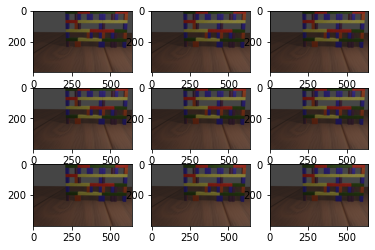

numpy.ndarray

In [19]:
# example of improve the brightness randownly

# load the image
img = load_img(f'{PATH}10001.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(channel_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
type(image)

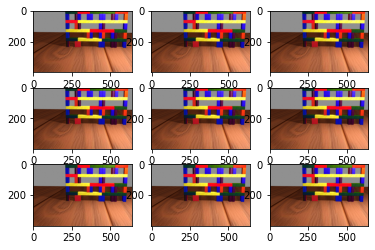

In [20]:
# example of improve the brightness randownly
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity

def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    '''
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    '''

    auto_result = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
    img = auto_result.astype(np.float)
    return img
# load the image
img = load_img(f'{PATH}10001.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(preprocessing_function=automatic_brightness_and_contrast)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure

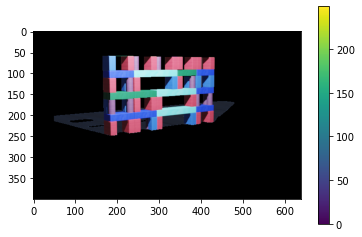

(<matplotlib.image.AxesImage at 0x7fe2c55e9e50>,
 None)

In [21]:
# example of background removal, not good still


# load the image
img = cv.imread(f'{PATH}1.png')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

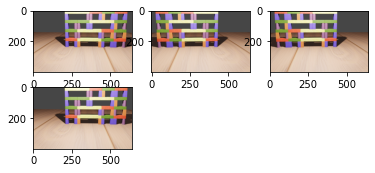

In [23]:
#example of flipping the image horizontally
# load the image
img = load_img(f'{PATH}820.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(4):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

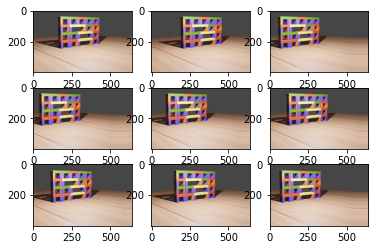

In [24]:
#example of width shift
# load the image
img = load_img(f'{PATH}1.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

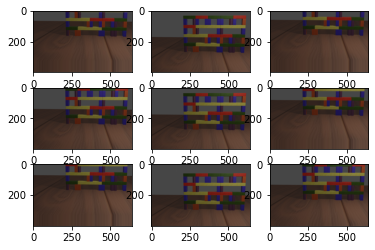

In [25]:
#example of height shift
# load the image
img = load_img(f'{PATH}10001.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

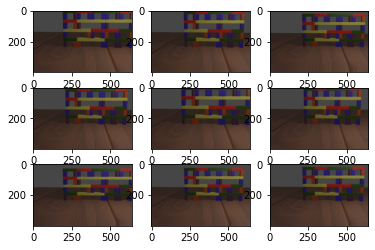

In [26]:
#example of zooming
# load the image
img = load_img(f'{PATH}10001.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=0.15)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

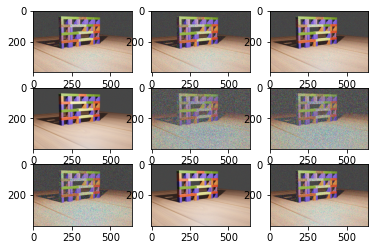

In [27]:
# example of adding noise image augmentation
import random
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img
# load the image
img = load_img(f'{PATH}1.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(preprocessing_function=add_noise)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

<function matplotlib.pyplot.show(*args, **kw)>

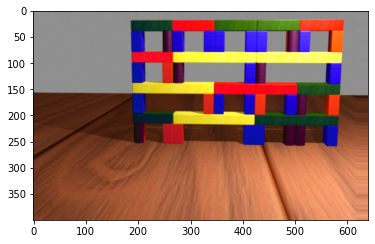

In [28]:
#apply all augmentation
import random
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img
def contrast_improvement(image):
    image=tf.image.adjust_contrast(image, 1.3)
    image = np.array(image)
    image = cv.cvtColor(image,cv.COLOR_RGB2HSV)
    return image
# load the image
img = load_img(f'{PATH}10001.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
  horizontal_flip=True, #flip the image horizontally
  #brightness_range=[1.0,1.2],  #brightness improvement
  width_shift_range=0.2, #horizontal shift
  height_shift_range=0.2, #vertical shift
  #preprocessing_function=add_noise,
  preprocessing_function=automatic_brightness_and_contrast, #improving contrast
  #vertical_flip=True,
  fill_mode='nearest')
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(1):
	# define subplot
	#pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show